In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, export_text, DecisionTreeRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

In [18]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [19]:
iris['sepal_length'].describe()

count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64

In [20]:
q3 = iris['sepal_length'].quantile(0.75)
iris_q4 = iris[iris['sepal_length'] > q3].copy() 
num_nan = int(len(iris_q4) * 0.7)  
indices_nan = np.random.choice(iris_q4.index, size=num_nan, replace=False) 
iris.loc[indices_nan, 'sepal_width'] = np.nan

In [21]:
iris['NA'] = iris['sepal_width'].isna().astype(int)
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species,NA
0,5.1,3.5,1.4,0.2,setosa,0
1,4.9,3.0,1.4,0.2,setosa,0
2,4.7,3.2,1.3,0.2,setosa,0
3,4.6,3.1,1.5,0.2,setosa,0
4,5.0,3.6,1.4,0.2,setosa,0


In [22]:
# Aplicar One-Hot Encoding
iris_encoded = pd.get_dummies(iris, columns=['species'],drop_first=True)
X = iris_encoded.drop(columns=['NA', 'sepal_width'])
y = iris_encoded['NA']
X.head()

,sepal_length,petal_length,petal_width,species_versicolor,species_virginica
0,5.1,1.4,0.2,False,False
1,4.9,1.4,0.2,False,False
2,4.7,1.3,0.2,False,False
3,4.6,1.5,0.2,False,False
4,5.0,1.4,0.2,False,False


In [23]:
# min_sample_split: el número mínimo de casos que contiene una hoja para que pueda ser creada.
# criterion: Criterio de división: “gini”, “entropy”, “log_loss”.
# max_depth = Profundidad máxima del árbol. En caso de no especificar, el clasificador sigue segmentando hasta que
# las hojas son puras, o se alcanza el min_sample_split. Con caracter ilustrativo, se selecciona bajo.
arbol1 = DecisionTreeClassifier(min_samples_split=30, criterion='gini', max_depth = 2)
# Crear un conjunto de entrenamiento y uno de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Construir el modelo de árbol de decisiones
arbol1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_split=30)

In [24]:
# Se estudia la importancia - o valor predictivo - de cada variable en el modelo.
print(pd.DataFrame({'nombre': arbol1.feature_names_in_, 'importancia': arbol1.feature_importances_}))

               nombre  importancia
0        sepal_length          1.0
1        petal_length          0.0
2         petal_width          0.0
3  species_versicolor          0.0
4   species_virginica          0.0


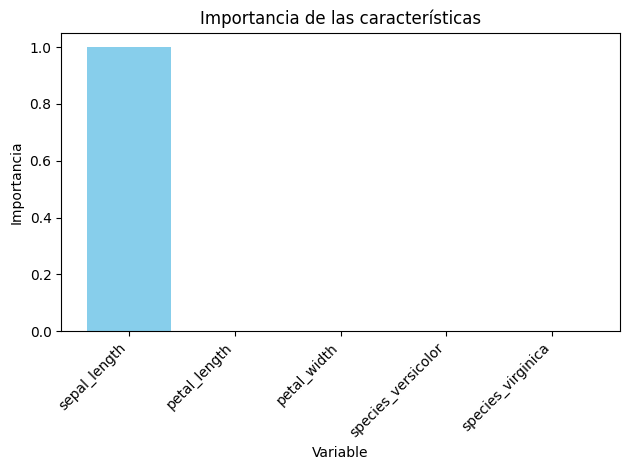

In [26]:
# Ordenar el DataFrame por importancia en orden descendente
df_importancia = pd.DataFrame({'Variable': arbol1.feature_names_in_, 'Importancia': arbol1.feature_importances_}).sort_values(by='Importancia', ascending=False)

# Crear un gráfico de barras
plt.bar(df_importancia['Variable'], df_importancia['Importancia'], color='skyblue')
plt.xlabel('Variable')
plt.ylabel('Importancia')
plt.title('Importancia de las características')
plt.xticks(rotation=45, ha='right')  # Rotar los nombres en el eje x para mayor legibilidad
plt.tight_layout()

# Mostrar el gráfico
plt.show()

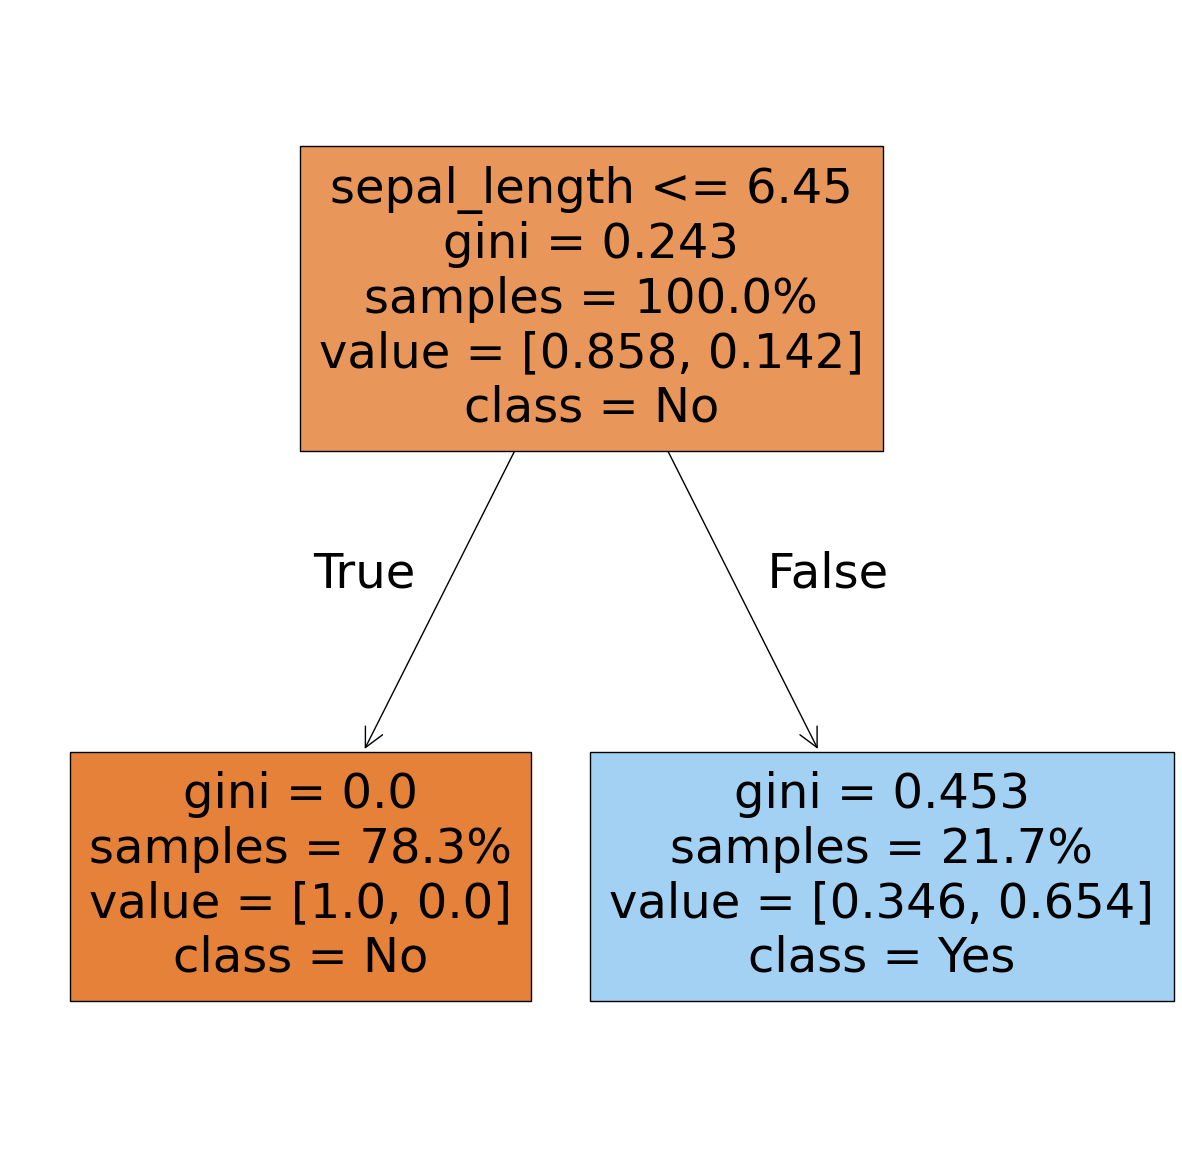

In [27]:
plt.figure(figsize=(15, 15))
plot_tree(arbol1, feature_names=X.columns.tolist(), class_names=['No', 'Yes'], filled=True,
         proportion = True)
plt.show()